In [28]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
import time
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | kirakira
Processing Record 3 of Set 1 | feltre
Processing Record 4 of Set 1 | agva
City not found. Skipping...
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | ivaipora
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | bandarbeyla
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | henties bay
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | sinnamary
Processing Record 21 of Set 1 | port elizabeth
Processing Rec

Processing Record 34 of Set 4 | east london
Processing Record 35 of Set 4 | mahebourg
Processing Record 36 of Set 4 | sao joao da barra
Processing Record 37 of Set 4 | gardan diwal
City not found. Skipping...
Processing Record 38 of Set 4 | marsa matruh
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | yeletskiy
City not found. Skipping...
Processing Record 44 of Set 4 | kant
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | buchanan
Processing Record 47 of Set 4 | carros
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | marzuq
Processing Record 50 of Set 4 | fort saint james
Processing Record 1 of Set 5 | ixtapa
Processing Record 2 of Set 5 | buariki
City not found. Skipping...
Processing Record 3 of Set 5 | tabulbah
City not found. Skipping...
Processing Record 4 of

Processing Record 22 of Set 8 | itamaraca
Processing Record 23 of Set 8 | beidao
Processing Record 24 of Set 8 | biak
Processing Record 25 of Set 8 | ipixuna
Processing Record 26 of Set 8 | aripuana
Processing Record 27 of Set 8 | pulaski
Processing Record 28 of Set 8 | batagay-alyta
Processing Record 29 of Set 8 | huarmey
Processing Record 30 of Set 8 | yantai
Processing Record 31 of Set 8 | hastings
Processing Record 32 of Set 8 | hualmay
Processing Record 33 of Set 8 | yeppoon
Processing Record 34 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 35 of Set 8 | byron bay
Processing Record 36 of Set 8 | brooks
Processing Record 37 of Set 8 | mocambique
City not found. Skipping...
Processing Record 38 of Set 8 | iturbe
Processing Record 39 of Set 8 | irbeyskoye
Processing Record 40 of Set 8 | sorvag
City not found. Skipping...
Processing Record 41 of Set 8 | kodiak
Processing Record 42 of Set 8 | taburi
City not found. Skipping...
Processing Record 43 of Set 8 | port

Processing Record 9 of Set 12 | lincoln
Processing Record 10 of Set 12 | balabac
Processing Record 11 of Set 12 | harper
Processing Record 12 of Set 12 | ulaangom
Processing Record 13 of Set 12 | mercedes
Processing Record 14 of Set 12 | kuche
City not found. Skipping...
Processing Record 15 of Set 12 | svetlogorsk
Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | puerto escondido
Processing Record 18 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 19 of Set 12 | west plains
Processing Record 20 of Set 12 | arrifes
Processing Record 21 of Set 12 | port hedland
Processing Record 22 of Set 12 | nuuk
Processing Record 23 of Set 12 | sann
Processing Record 24 of Set 12 | mackay
Processing Record 25 of Set 12 | abilene
Processing Record 26 of Set 12 | bardiyah
Processing Record 27 of Set 12 | zholymbet
Processing Record 28 of Set 12 | arosa
Processing Record 29 of Set 12 | saint-francois
Processing Record 30 of Set 12 | waingapu
Processing Re

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,40.05,76,100,2.08,AU,2021-10-25 20:55:58
1,Kirakira,-10.4544,161.9205,82.51,77,28,8.39,SB,2021-10-25 20:55:58
2,Feltre,46.0235,11.9070,53.67,77,100,1.79,IT,2021-10-25 20:55:58
3,Hasaki,35.7333,140.8333,59.40,90,100,30.22,JP,2021-10-25 20:55:59
4,Hobart,-42.8794,147.3294,50.25,71,75,9.22,AU,2021-10-25 20:56:00
5,Ivaipora,-24.2478,-51.6847,69.75,79,44,0.92,BR,2021-10-25 20:56:00
6,Rikitea,-23.1203,-134.9692,75.07,72,96,21.18,PF,2021-10-25 20:56:00
7,Laguna,38.4210,-121.4238,67.10,57,40,4.00,US,2021-10-25 20:56:01
8,Ushuaia,-54.8000,-68.3000,37.02,80,75,26.46,AR,2021-10-25 20:56:02
9,Saint-Philippe,-21.3585,55.7679,72.95,81,42,12.77,RE,2021-10-25 20:56:03


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-10-25 20:55:58,-33.6500,115.3333,40.05,76,100,2.08
1,Kirakira,SB,2021-10-25 20:55:58,-10.4544,161.9205,82.51,77,28,8.39
2,Feltre,IT,2021-10-25 20:55:58,46.0235,11.9070,53.67,77,100,1.79
3,Hasaki,JP,2021-10-25 20:55:59,35.7333,140.8333,59.40,90,100,30.22
4,Hobart,AU,2021-10-25 20:56:00,-42.8794,147.3294,50.25,71,75,9.22
5,Ivaipora,BR,2021-10-25 20:56:00,-24.2478,-51.6847,69.75,79,44,0.92
6,Rikitea,PF,2021-10-25 20:56:00,-23.1203,-134.9692,75.07,72,96,21.18
7,Laguna,US,2021-10-25 20:56:01,38.4210,-121.4238,67.10,57,40,4.00
8,Ushuaia,AR,2021-10-25 20:56:02,-54.8000,-68.3000,37.02,80,75,26.46
9,Saint-Philippe,RE,2021-10-25 20:56:03,-21.3585,55.7679,72.95,81,42,12.77


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/25/21'

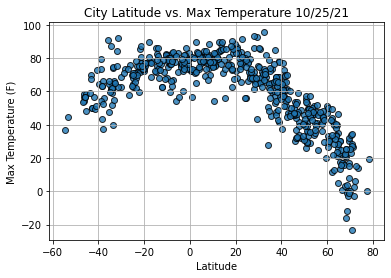

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

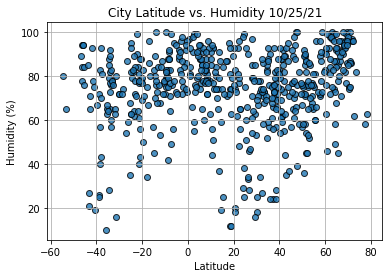

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

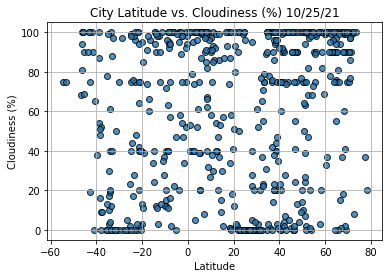

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

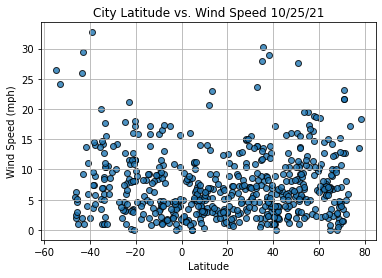

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [31]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

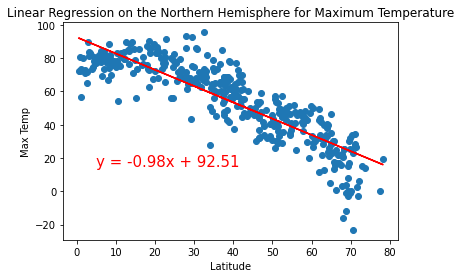

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,15))

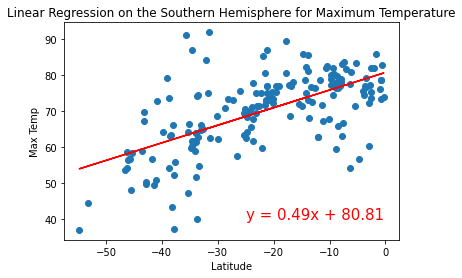

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,40))

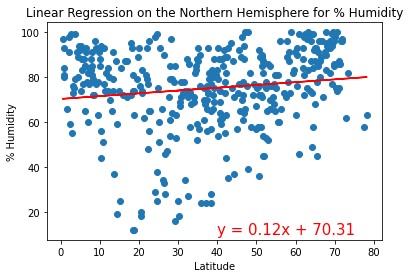

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

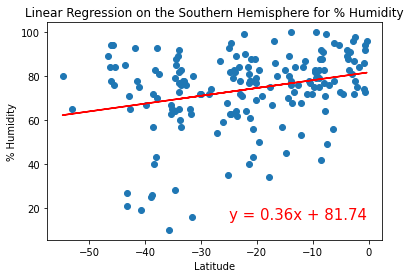

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,15))

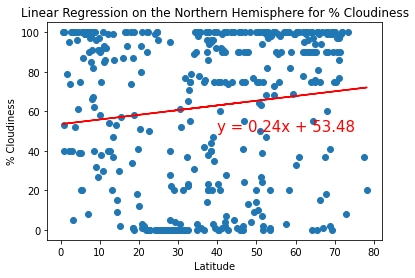

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,50))

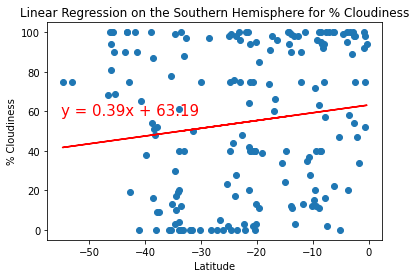

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,58))

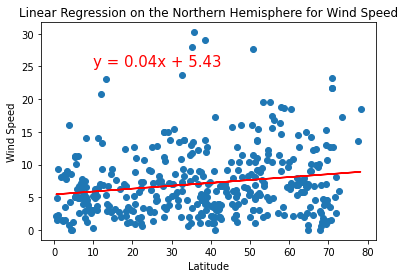

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,25))

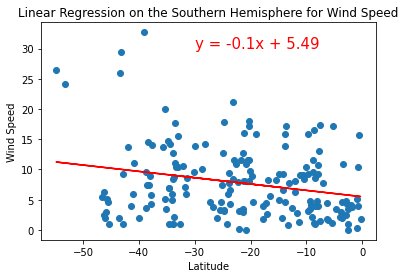

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))